# LOGO DETECTION

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Flatten
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\arpit pandey\anaconda3\lib\site-packages\tensorflo

## Building the Model

In [25]:
#Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32,(3,3), input_shape = (64,64,3),
                             activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

#Adding the second cinvolution layer
classifier.add(Convolution2D(32,(3,3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1 , activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

## Image Augmentation

In [26]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (64,64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 30 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [27]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = (8000/32),
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = (2000/32))

Epoch 1/25
250/250 [==============================] - 41s 164ms/step - loss: 0.0741 - accuracy: 0.9696 - val_loss: 6.8066 - val_accuracy: 0.6000
Epoch 2/25
250/250 [==============================] - 41s 164ms/step - loss: 3.1944e-04 - accuracy: 1.0000 - val_loss: 8.2609 - val_accuracy: 0.6000
Epoch 3/25
250/250 [==============================] - 41s 163ms/step - loss: 1.5250e-04 - accuracy: 1.0000 - val_loss: 9.3737 - val_accuracy: 0.6000
Epoch 4/25
250/250 [==============================] - 40s 161ms/step - loss: 4.4215e-05 - accuracy: 1.0000 - val_loss: 9.8794 - val_accuracy: 0.6000
Epoch 5/25
250/250 [==============================] - 41s 164ms/step - loss: 2.2183e-05 - accuracy: 1.0000 - val_loss: 10.2294 - val_accuracy: 0.6000
Epoch 6/25
250/250 [==============================] - 41s 163ms/step - loss: 1.4931e-05 - accuracy: 1.0000 - val_loss: 10.5087 - val_accuracy: 0.6000
Epoch 7/25
250/250 [==============================] - 42s 167ms/step - loss: 1.1968e-05 - accuracy: 1.0000 -

In [10]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [28]:
classifier.evaluate_generator(test_set)

[13.78229808807373, 0.6000000238418579]

In [37]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('datasets/single_prediction/image3.jpg',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'apple'
    print(prediction)
else:
    prediction = 'not apple'
    print(prediction)

[[0.]]
not apple


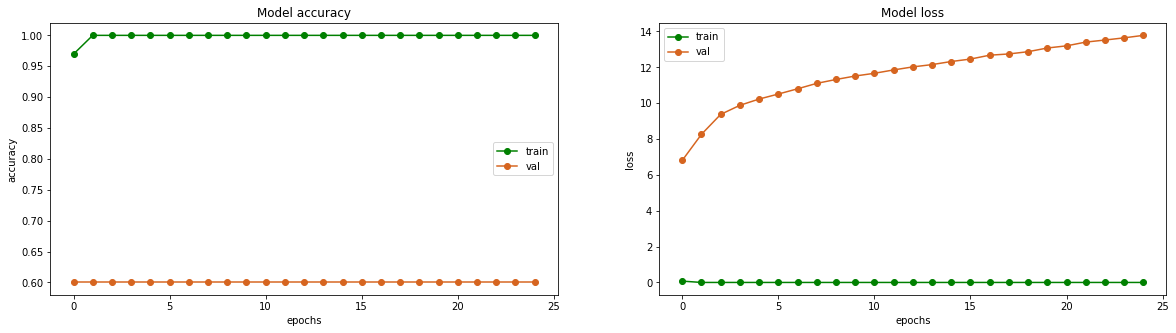

In [38]:
fig1,ax1 = plt.subplots(1,2,figsize = (20,5))
    
for i,j in enumerate(['accuracy','loss']):
    ax1[i].plot(history.history[j],'o-',color = 'green')
    ax1[i].plot(history.history['val_'+j],'o-',color = '#D66520')
    ax1[i].set_title('Model '+str(j))
    ax1[i].set_xlabel('epochs')
    ax1[i].set_ylabel(j)
    ax1[i].legend(['train','val'])

# Transfer Learning through ResNet50

In [130]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'datasets/training_set'
valid_path = 'datasets/test_set'

# add preprocessing layer to the front of VGG
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in resnet.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('datasets/training_set/*')
  

# our layers - you can add more if you want
x = Flatten()(resnet.output)

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('datasets/training_set',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('datasets/test_set',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasets/training_set'

In [131]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=(210//32),
  validation_steps=(60//32))

AttributeError: 'Tensor' object has no attribute 'assign'

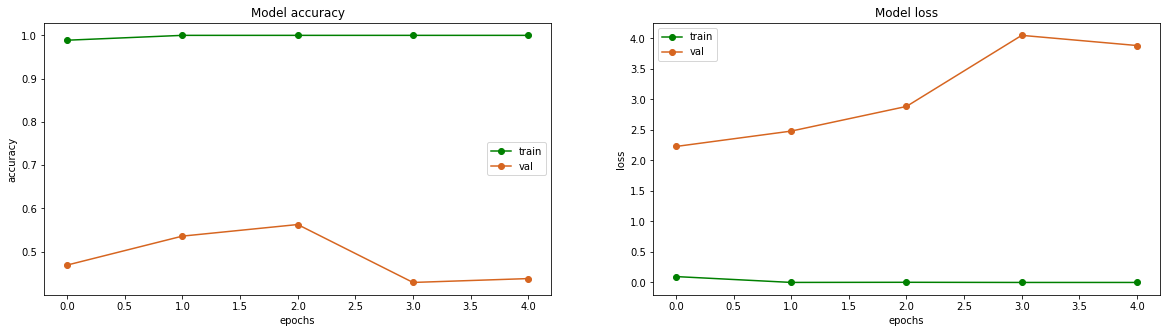

In [75]:
fig1,ax1 = plt.subplots(1,2,figsize = (20,5))
    
for i,j in enumerate(['accuracy','loss']):
    ax1[i].plot(r.history[j],'o-',color = 'green')
    ax1[i].plot(r.history['val_'+j],'o-',color = '#D66520')
    ax1[i].set_title('Model '+str(j))
    ax1[i].set_xlabel('epochs')
    ax1[i].set_ylabel(j)
    ax1[i].legend(['train','val'])

In [76]:
from keras.preprocessing import image
import numpy as np
test_image = image.load_img('datasets/single_prediction/image4.png',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)
if result[0][0] == 1:
    prediction = 'apple'
    print(prediction)
else:
    prediction = 'not apple'
    print(prediction)

[[0.]]
not apple


In [67]:
model.evaluate_generator(test_set)

[3.2278149127960205, 0.6000000238418579]

# Converting into gray Scale

In [115]:
from PIL import Image,ImageOps
import os
import matplotlib.image as mimg
address = r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set_gray\apple\\'
for filename in os.listdir(r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set\apple'):
    print(filename)
    src =r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set\apple\\'+ filename 
    img = Image.open(src)
    gray =  ImageOps.grayscale(img) 
    gray.save(address+ filename)
    
    

logo1 .png
logo10 .jpg
logo100 .png
logo101 .png
logo102 .png
logo103 .png
logo104 .png
logo105 .png
logo11 .jpg
logo12 .jpg
logo13 .jpg
logo14 .jpg
logo15 .jpg
logo16 .jpg
logo17 .jpg
logo18 .jpg
logo19 .jpg
logo2 .png
logo20 .jpg
logo21 .jpg
logo22 .jpg
logo23 .jpg
logo24 .jpg
logo25 .jpg
logo26 .jpg
logo27 .jpg
logo28 .jpg
logo29 .png
logo3 .png
logo30 .png
logo31 .png
logo32 .png
logo33 .png
logo34 .png
logo35 .png
logo36 .jpg
logo37 .jpg
logo38 .jpg
logo39 .jpg
logo4 .png
logo40 .jpg
logo41 .jpg
logo42 .jpg
logo43 .jpg
logo44 .jpg
logo45 .jpg
logo46 .jpg
logo47 .jpg
logo48 .jpg
logo49 .jpg
logo5 .png
logo50 .png
logo51 .png
logo52 .png
logo53 .png
logo54 .png
logo55 .png
logo56 .png
logo57 .png
logo58 .png
logo59 .png
logo6 .png
logo60 .png
logo61 .png
logo62 .png
logo63 .png
logo64 .png
logo65 .png
logo66 .png
logo67 .png
logo68 .png
logo69 .png
logo7 .png
logo70 .png
logo71 .png
logo72 .png
logo73 .png
logo74 .png
logo75 .png
logo76 .png
logo77 .png
logo78 .jpg
logo79 .jpg
logo8

In [116]:
address = r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set_gray\not apple\\'
for filename in os.listdir(r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set\not apple'):
    print(filename)
    src =r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\training_set\not apple\\'+ filename 
    img = Image.open(src)
    gray =  ImageOps.grayscale(img) 
    gray.save(address+ filename)

logo1 .jpg
logo10 .png
logo100 .jpg
logo101 .jpg
logo102 .jpg
logo103 .jpg
logo104 .jpg
logo105 .jpg
logo11 .png
logo12 .png
logo13 .png
logo14 .png
logo15 .png
logo16 .png
logo17 .png
logo18 .png
logo19 .png
logo2 .jpg
logo20 .png
logo21 .png
logo22 .png
logo23 .png
logo24 .png
logo25 .png
logo26 .png
logo27 .png
logo28 .png
logo29 .jpg
logo3 .jpg
logo30 .jpg
logo31 .jpg
logo32 .jpg
logo33 .jpg
logo34 .jpg
logo35 .jpg
logo36 .png
logo37 .png
logo38 .png
logo39 .png
logo4 .jpg
logo40 .png
logo41 .png
logo42 .png
logo43 .jpg
logo44 .jpg
logo45 .jpg
logo46 .jpg
logo47 .jpg
logo48 .jpg
logo49 .jpg
logo5 .jpg
logo50 .jpg
logo51 .jpg
logo52 .jpg
logo53 .jpg
logo54 .jpg
logo55 .jpg
logo56 .jpg
logo57 .jpg
logo58 .jpg
logo59 .jpg
logo6 .jpg
logo60 .jpg
logo61 .jpg
logo62 .jpg
logo63 .jpg
logo64 .jpg
logo65 .jpg
logo66 .jpg
logo67 .jpg
logo68 .jpg
logo69 .jpg
logo7 .jpg
logo70 .jpg
logo71 .jpg
logo72 .jpg
logo73 .jpg
logo74 .jpg
logo75 .jpg
logo76 .jpg
logo77 .jpg
logo78 .jpg
logo79 .jpg
logo8

In [117]:
address = r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set_gray\apple\\'
for filename in os.listdir(r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set\apple'):
    print(filename)
    src =r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set\apple\\'+ filename 
    img = Image.open(src)
    gray =  ImageOps.grayscale(img) 
    gray.save(address+ filename)

logo1 .jpg
logo10 .png
logo11 .png
logo12 .png
logo13 .jpg
logo14 .jpg
logo15 .jpg
logo16 .jpg
logo17 .jpg
logo18 .jpg
logo19 .jpg
logo2 .jpg
logo20 .jpg
logo21 .jpg
logo22 .jpg
logo23 .jpg
logo24 .jpg
logo25 .jpg
logo26 .jpg
logo27 .jpg
logo28 .jpg
logo29 .jpg
logo3 .jpg
logo30 .jpg
logo4 .jpg
logo5 .jpg
logo6 .jpg
logo7 .png
logo8 .png
logo9 .png


In [120]:
address = r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set_gray\not apple\\'
for filename in os.listdir(r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set\not apple'):
    print(filename)
    src =r'C:\Users\arpit pandey\Desktop\Logo Detection\datasets\test_set\not apple\\'+ filename 
    img = Image.open(src)
    gray =  ImageOps.grayscale(img) 
    gray.save(address+ filename)

logo1 .jpg
logo10 .jpg
logo11 .jpg
logo12 .jpg
logo13 .jpg
logo14 .jpg
logo15 .jpg
logo16 .jpg
logo17 .jpg
logo18 .jpg
logo19 .jpg
logo2 .jpg
logo20 .jpg
logo21 .jpg
logo22 .jpg
logo23 .jpg
logo24 .jpg
logo25 .jpg
logo26 .jpg
logo27 .jpg
logo28 .jpg
logo29 .jpg
logo3 .jpg
logo30 .jpg
logo4 .jpg
logo5 .jpg
logo6 .jpg
logo7 .jpg
logo8 .jpg
logo9 .jpg


Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'datasetg/trainingg'